In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [2]:
np.random.seed(42)
n_samples = 100

#features, random data

TV = np.random.uniform(50, 300, n_samples)
radio = np.random.uniform(10,100, n_samples)
social_media = np.random.uniform(5,50, n_samples)



NameError: name 'np' is not defined

[138.22834542 271.62890954 239.49543987 218.16418593 120.64768412
  99.14938779  81.02940146 284.01659787 177.22122728 199.29497497
  84.72125626 273.18605705 265.99071432 138.28894595 127.93376267
 132.9093442  178.79417907 181.65352058 183.24839424 160.51344462
 248.57168334 146.78452108 114.17202706 131.8369952  172.27183908
 228.81617839 154.18139056 214.879499   174.1316526   97.29555477
 174.86644375  95.14037085  77.24556936 254.67948375 315.503424
 227.08411773 140.82742943 111.6331179  232.10921272 181.03910388
 153.20762931 178.1119924   88.7647063  260.22968634 121.8366443
 193.52648385 154.2371961  192.85497558 178.76595158 122.65473457
 315.2985116  213.28357112 281.04479022 242.65348821 226.07542141
 263.34582077 121.9418281  135.99343877  79.99248845 153.2716223
 152.5046971  162.77606915 257.91939528 152.85085263 134.40308475
 219.21892294 115.5453022  238.79121927  66.17516681 280.14728575
 261.93674105 110.17911255  92.75390893 241.32507884 248.39057079
 208.57197686 

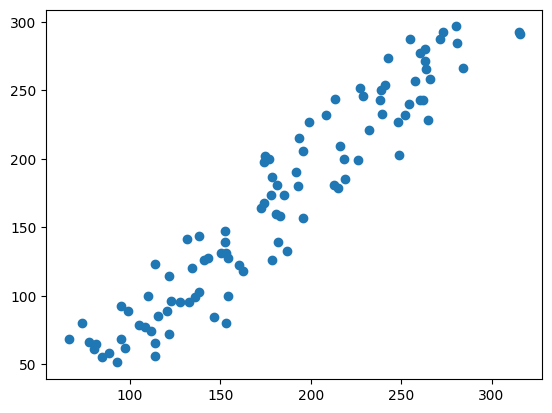

In [3]:
sales = 5 + 0.8*(TV) +0.6*radio + 0.3*social_media + np.random.normal(0,10,n_samples)

print(sales)

#sales vs TV
plt.scatter(sales, TV)

            TV      Radio  Social Media       Sales
0   143.635030  12.828627     33.891424  138.228345
1   287.678577  67.276937      8.786298  271.628910
2   232.998485  38.292038     12.273292  239.495440
3   199.664621  55.771362     45.434938  218.164186
4    89.004660  91.680983     32.289308  120.647684
..         ...        ...           ...         ...
95  173.448899  41.428862     28.500947  185.083347
96  180.683207  75.336011     39.649710  212.884284
97  156.885255  90.739923     14.711946  195.649197
98   56.354782  89.837778     33.030071  113.773046
99   76.972857  80.188799      8.840636  108.371212

[100 rows x 4 columns]


In [5]:
from sklearn.model_selection import train_test_split
X = data[["TV", "Radio", "Social Media"]]
Y = data["Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

In [6]:
print(X)

            TV      Radio  Social Media
0   143.635030  12.828627     33.891424
1   287.678577  67.276937      8.786298
2   232.998485  38.292038     12.273292
3   199.664621  55.771362     45.434938
4    89.004660  91.680983     32.289308
..         ...        ...           ...
95  173.448899  41.428862     28.500947
96  180.683207  75.336011     39.649710
97  156.885255  90.739923     14.711946
98   56.354782  89.837778     33.030071
99   76.972857  80.188799      8.840636

[100 rows x 3 columns]


In [7]:
# X_train = X_train.reshape(-1,1)
# type(X_train)
# X_test = X_test.reshape(-1,1)

In [8]:
print(X_train)

            TV      Radio  Social Media
39  160.038123  97.460387     12.969981
22  123.036162  38.620313      9.215365
80  265.775856  40.695972     45.050240
10   55.146124  36.077631     29.693021
0   143.635030  12.828627     33.891424
..         ...        ...           ...
60  147.169322  43.100482     32.675325
71   99.678920  11.492905     41.455103
14   95.456242  67.006338     37.048065
92  240.196262  91.037625     42.017025
51  243.783206  31.560570     22.329398

[95 rows x 3 columns]


In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

In [10]:
#can graph only if i have one predictor

# plt.scatter(X_test, Y_test)
# plt.plot(X_test, y_pred)

In [11]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(mse)
print(f"R² Score: {r2:.4f}")


119.69457810034672
R² Score: 0.9673


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train, Y_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.4f}")


Cross-Validation R² Scores: [0.96159183 0.97740255 0.97169274 0.99064247 0.96220552]
Mean R² Score: 0.9727
